In [1]:
import skdim
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import pandas as pd
import numpy as np
import torch
import nltk
from plotly.subplots import make_subplots
from phd import get_phd, get_raw_phd, get_embeds, get_raw_phd_in_loop
from tqdm import tqdm
from transformers import AutoModelForCausalLM, AutoTokenizer
from transformers import modeling_utils
if not hasattr(modeling_utils, "ALL_PARALLEL_STYLES") or modeling_utils.ALL_PARALLEL_STYLES is None:
    modeling_utils.ALL_PARALLEL_STYLES = ["tp", "none", "colwise", 'rowwise']

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [47]:
df = pd.read_parquet("../second_week/data/train-00000-of-00009.parquet")
embeds_list = []
tokens_list = []
for i in tqdm(range(2, 50, 2)):
    text = ''.join(df['generation'].values.tolist()[i:(i + 1)])
    embeds, tokens = get_embeds(text, returns_tokenized=True)
    embeds_list.append(embeds)
    tokens_list.extend(tokens)

100%|███████████████████████████████████████████| 24/24 [00:06<00:00,  3.64it/s]


In [49]:
embeds = np.concatenate(embeds_list)
tokens = tokens_list

In [50]:
embeds.shape

(4526, 768)

In [54]:
raw_phd = get_raw_phd_in_loop(embeds, alpha=2, n_tries=1)


mn_points =  40 max_points =  4526 point_jump =  640
input_shape: (4526, 768)
test_n =  range(40, 3886, 640)
nSamples =  40 n =  4526
test_n =  range(40, 3886, 640)
nSamples =  40 n =  4526
test_n =  range(40, 3886, 640)
nSamples =  40 n =  4526
nSamples =  40 n =  4526
nSamples =  40 n =  4526
nSamples =  40 n =  4526
nSamples =  40 n =  4526
nSamples =  40 n =  4526
nSamples =  40 n =  4526
nSamples =  40 n =  4526
nSamples =  40 n =  4526
nSamples =  40 n =  4526
nSamples =  40 n =  4526
nSamples =  40 n =  4526
nSamples =  40 n =  4526
nSamples =  40 n =  4526
nSamples =  40 n =  4526
nSamples =  40 n =  4526
nSamples =  40 n =  4526
nSamples =  40 n =  4526
nSamples =  40 n =  4526
nSamples =  40 n =  4526
nSamples =  40 n =  4526
nSamples =  40 n =  4526
nSamples =  40 n =  4526
nSamples =  680 n =  4526
nSamples =  40 n =  4526
nSamples =  40 n =  4526
nSamples =  680 n =  4526
nSamples =  680 n =  4526
nSamples =  680 n =  4526
nSamples =  680 n =  4526
nSamples =  680 n =  452


KeyboardInterrupt



nSamples =  680 n =  4526
nSamples =  1320 n =  4526
nSamples =  1320 n =  4526
nSamples =  1320 n =  4526
nSamples =  1320 n =  4526
nSamples =  1320 n =  4526
nSamples =  1320 n =  4526
nSamples =  1320 n =  4526
nSamples =  1320 n =  4526
nSamples =  1320 n =  4526
nSamples =  1320 n =  4526
nSamples =  1320 n =  4526
nSamples =  1320 n =  4526
nSamples =  1320 n =  4526
nSamples =  1320 n =  4526
nSamples =  1320 n =  4526
nSamples =  1320 n =  4526
nSamples =  1320 n =  4526
nSamples =  1320 n =  4526
nSamples =  1320 n =  4526
nSamples =  1320 n =  4526
nSamples =  1320 n =  4526
nSamples =  1320 n =  4526
nSamples =  1320 n =  4526
nSamples =  1320 n =  4526
nSamples =  1320 n =  4526
nSamples =  1320 n =  4526
nSamples =  1960 n =  4526
nSamples =  1320 n =  4526
nSamples =  1960 n =  4526
nSamples =  1960 n =  4526
nSamples =  1960 n =  4526
nSamples =  1960 n =  4526
nSamples =  1960 n =  4526
nSamples =  1960 n =  4526
nSamples =  1960 n =  4526
nSamples =  1960 n =  4526
nS

In [34]:
tagged_tokens = nltk.pos_tag(tokens, tagset='universal')
df_token2type = pd.DataFrame(tagged_tokens, columns=['token', 'type_token'])

In [36]:
df_token2type['type_token'].value_counts()

type_token
NOUN    201
.        46
VERB     44
ADJ      42
ADV       7
ADP       5
DET       3
X         2
PRT       1
PRON      1
Name: count, dtype: int64

In [37]:
df_token2type['embed'] = [embed for embed in embeds]

In [41]:
typetoken2phd = dict()
for type_token in ['NOUN', '.', 'VERB', 'ADJ']:
    df_subsample = df_token2type.query("type_token == @type_token")
    embeds_subsample = df_subsample['embed'].apply(pd.Series).values
    phd = get_raw_phd_in_loop((embeds + 15) / 30)
    typetoken2phd[type_token] = phd

mn_points =  40 max_points =  352 point_jump =  44
input_shape: (352, 768)
test_n =  range(40, 308, 44)
nSamples =  40 n =  352
test_n =  range(40, 308, 44)
nSamples =  40 n =  352
test_n =  range(40, 308, 44)
nSamples =  40 n =  352
nSamples =  40 n =  352
nSamples =  40 n =  352
nSamples =  40 n =  352
nSamples =  40 n =  352
nSamples =  40 n =  352
nSamples =  40 n =  352
nSamples =  40 n =  352
nSamples =  40 n =  352
nSamples =  40 n =  352
nSamples =  40 n =  352
nSamples =  40 n =  352
nSamples =  40 n =  352
nSamples =  40 n =  352
nSamples =  40 n =  352
nSamples =  40 n =  352
nSamples =  40 n =  352
nSamples =  40 n =  352
nSamples =  40 n =  352
nSamples =  40 n =  352
nSamples =  40 n =  352
nSamples =  40 n =  352
nSamples =  40 n =  352
nSamples =  40 n =  352
nSamples =  40 n =  352
nSamples =  84 n =  352
nSamples =  84 n =  352
nSamples =  84 n =  352
nSamples =  84 n =  352
nSamples =  84 n =  352
nSamples =  84 n =  352
nSamples =  84 n =  352
nSamples =  84 n =  35

<Axes: >

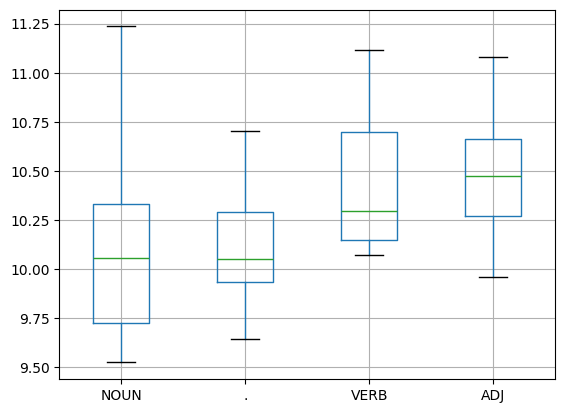

In [44]:
pd.DataFrame(typetoken2phd).boxplot()

In [55]:
tagged_tokens = nltk.pos_tag(tokens, tagset='universal')
df_token2type = pd.DataFrame(tagged_tokens, columns=['token', 'type_token'])
print(df_token2type['type_token'].value_counts())
df_token2type['embed'] = [embed for embed in embeds]
typetoken2phd = dict()
for type_token in ['NOUN', '.', 'VERB', 'ADJ', 'ADV', 'ADP']:
    df_subsample = df_token2type.query("type_token == @type_token")
    embeds_subsample = df_subsample['embed'].apply(pd.Series).values
    phd = get_raw_phd_in_loop((embeds_subsample - embeds_subsample.min()) / (embeds_subsample.max() - embeds_subsample.min()))
    typetoken2phd[type_token] = phd

type_token
NOUN    2575
VERB     610
ADJ      583
.        447
ADV      109
ADP       61
PRON      31
X         29
CONJ      28
NUM       28
DET       13
PRT       12
Name: count, dtype: int64

mn_points =  40 max_points =  2575 point_jump =  362
input_shape: (2575, 768)
test_n =  range(40, 2213, 362)
nSamples =  40 n =  2575
test_n =  range(40, 2213, 362)
nSamples =  40 n =  2575
test_n =  range(40, 2213, 362)
nSamples =  40 n =  2575
nSamples =  40 n =  2575
nSamples =  40 n =  2575
nSamples =  40 n =  2575
nSamples =  40 n =  2575
nSamples =  40 n =  2575
nSamples =  40 n =  2575
nSamples =  40 n =  2575
nSamples =  40 n =  2575
nSamples =  40 n =  2575
nSamples =  40 n =  2575
nSamples =  40 n =  2575
nSamples =  40 n =  2575
nSamples =  40 n =  2575
nSamples =  40 n =  2575
nSamples =  40 n =  2575
nSamples =  40 n =  2575
nSamples =  40 n =  2575
nSamples =  40 n =  2575
nSamples =  40 n =  2575
nSamples =  40 n =  2575
nSamples =  40 n =  2575
nSamples =  40 n =  2575
nSamples =  40 n =  2575
nSamples =  402 n =  2575
nSamples =  402 n =  2575
nSamples =  40 n =  2575
nSamples =  402 n =  2575
nSamples =  402 n =  2575
nSamples =  402 n =  2575
nSamples =  402 n =  257

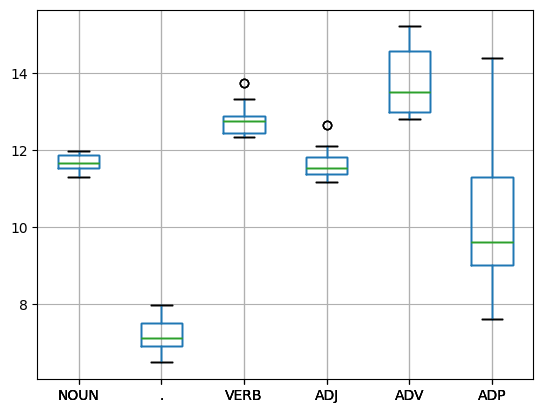

In [62]:
import matplotlib.pyplot as plt


pd.DataFrame(typetoken2phd).boxplot()
plt.show()

In [64]:
tagged_tokens = nltk.pos_tag(tokens)
df_token2type = pd.DataFrame(tagged_tokens, columns=['token', 'type_token'])
print(df_token2type['type_token'].value_counts())
df_token2type['embed'] = [embed for embed in embeds]
typetoken2phd = dict()


type_token
NNP     1632
NN       687
JJ       573
NNS      255
VBP      149
.        147
VBD      146
,        135
:        133
VBG      133
RB       106
VBZ       81
IN        61
VB        54
VBN       46
CC        28
CD        28
)         25
SYM       20
WP        18
PRP       12
FW         9
DT         8
RP         7
JJS        5
JJR        5
(          4
TO         4
EX         3
RBR        3
WDT        2
$          2
''         1
NNPS       1
MD         1
PRP$       1
POS        1
Name: count, dtype: int64


In [65]:
for type_token in ['NNP', 'NN', 'JJ', 'NNS', 'VBP', '.', 'VBD', ',', ':', 'VBG', 'RB']:
    df_subsample = df_token2type.query("type_token == @type_token")
    embeds_subsample = df_subsample['embed'].apply(pd.Series).values
    phd = get_raw_phd_in_loop((embeds_subsample - embeds_subsample.min()) / (embeds_subsample.max() - embeds_subsample.min()))
    typetoken2phd[type_token] = phd

mn_points =  40 max_points =  1632 point_jump =  227
input_shape: (1632, 768)
test_n =  range(40, 1405, 227)
nSamples =  40 n =  1632
test_n =  range(40, 1405, 227)
nSamples =  40 n =  1632
test_n =  range(40, 1405, 227)
nSamples =  40 n =  1632
nSamples =  40 n =  1632
nSamples =  40 n =  1632
nSamples =  40 n =  1632
nSamples =  40 n =  1632
nSamples =  40 n =  1632
nSamples =  40 n =  1632
nSamples =  40 n =  1632
nSamples =  40 n =  1632
nSamples =  40 n =  1632
nSamples =  40 n =  1632
nSamples =  40 n =  1632
nSamples =  40 n =  1632
nSamples =  40 n =  1632
nSamples =  40 n =  1632
nSamples =  40 n =  1632
nSamples =  40 n =  1632
nSamples =  40 n =  1632
nSamples =  40 n =  1632
nSamples =  40 n =  1632
nSamples =  40 n =  1632
nSamples =  40 n =  1632
nSamples =  40 n =  1632
nSamples =  40 n =  1632
nSamples =  40 n =  1632
nSamples =  267 n =  1632
nSamples =  267 n =  1632
nSamples =  267 n =  1632
nSamples =  267 n =  1632
nSamples =  267 n =  1632
nSamples =  267 n =  163

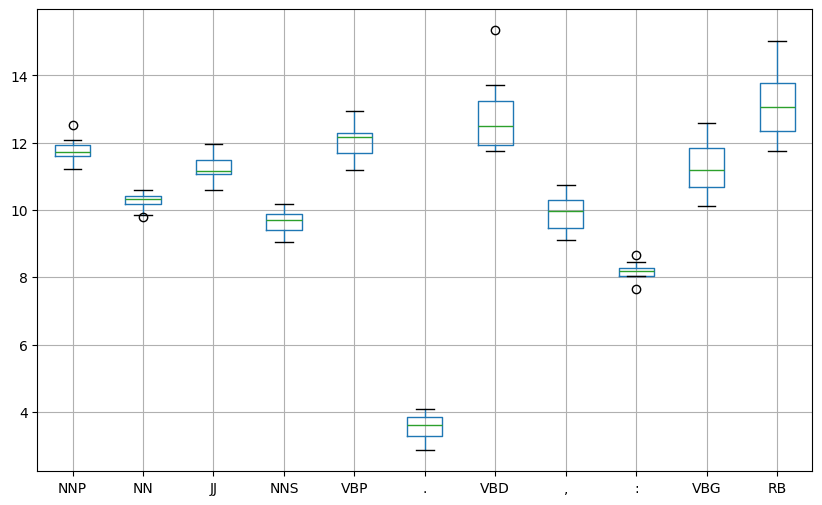

<Figure size 1000x1000 with 0 Axes>

In [71]:
plt.figure(figsize=(10, 6)) 
pd.DataFrame(typetoken2phd).boxplot()
plt.figure(figsize=(10, 10))
plt.show()

In [95]:
embeds_tmp = []
pd.DataFrame(df_token2type['embed']).sample(1000).apply(lambda x: embeds_tmp.append(x.values[0]), axis=1)

2055    None
3201    None
4350    None
440     None
445     None
        ... 
2767    None
2995    None
683     None
741     None
3220    None
Length: 1000, dtype: object

In [99]:
embeds_tmp = np.array(embeds_tmp)

In [100]:
phd_all = get_raw_phd_in_loop(embeds_tmp)

mn_points =  40 max_points =  1000 point_jump =  137
input_shape: (1000, 768)
test_n =  range(40, 863, 137)
nSamples =  40 n =  1000
test_n =  range(40, 863, 137)
nSamples =  40 n =  1000
test_n =  range(40, 863, 137)
nSamples =  40 n =  1000
nSamples =  40 n =  1000
nSamples =  40 n =  1000
nSamples =  40 n =  1000
nSamples =  40 n =  1000
nSamples =  40 n =  1000
nSamples =  40 n =  1000
nSamples =  40 n =  1000
nSamples =  40 n =  1000
nSamples =  40 n =  1000
nSamples =  40 n =  1000
nSamples =  40 n =  1000
nSamples =  40 n =  1000
nSamples =  40 n =  1000
nSamples =  40 n =  1000
nSamples =  40 n =  1000
nSamples =  40 n =  1000
nSamples =  40 n =  1000
nSamples =  40 n =  1000
nSamples =  40 n =  1000
nSamples =  40 n =  1000
nSamples =  40 n =  1000
nSamples =  40 n =  1000
nSamples =  40 n =  1000
nSamples =  40 n =  1000
nSamples =  177 n =  1000
nSamples =  177 n =  1000
nSamples =  177 n =  1000
nSamples =  177 n =  1000
nSamples =  177 n =  1000
nSamples =  177 n =  1000
n

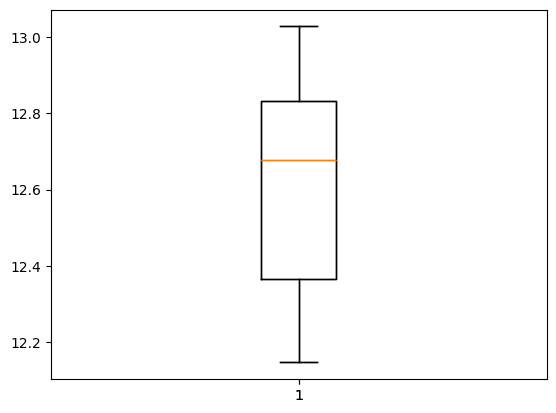

In [102]:
plt.boxplot(phd_all)
plt.show()

In [103]:
tagged_tokens2 = nltk.pos_tag(tokens, tagset='universal')


In [108]:
pd.DataFrame(tagged_tokens2, columns=['token', 'type']).query("type == '.'").value_counts()

token  type
.      .       146
,      .       135
-      .       124
)      .        21
:      .         6
{      .         4
}      .         4
;      .         3
 to    .         1
$      .         1
''     .         1
?      .         1
Name: count, dtype: int64